# Final Project - UFC

In [1]:
# Import Dependencies
%matplotlib inline
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import requests
import json

In [2]:
# RUN this pandas options for better view of the data like in Excel.

# Set pandas options
pd.set_option('display.max_rows', 6)
pd.options.display.max_columns = 50  # None -> No Restrictions
pd.options.display.max_rows = 200    # None -> Be careful with this 
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [3]:
# Fight Stats Uniform Raw Data - 

# FIGHT STATS BY FIGHTER
fight_stats_raw = pd.read_csv('fight_stats_rds_winby.csv', encoding='utf-8')


In [4]:
# View the data

fight_stats_raw.head()

ID   Age  Height  Weight                                      HomeTown  \
0  3099  29.0   162.0    52.0                                   Hebei China   
1  3161  30.0   180.0    61.0  Anaheim, California United States of America   
2  2263  29.0   182.0    77.0           Montclair, California Untied States   
3  2848  26.0   165.0    52.0                Denver, Colorado United States   
4  2375  29.0   180.0    65.0                               Brasilia Brazil   

                                         Location             Name   winby  \
0                                   Beijing China      Weili Zhang     DEC   
1  Riverside, California United States of America      Andre Ewell     DEC   
2                 Glendale, Arizona United States  Bryan Barberena  KO/TKO   
3             Westminster, Colorado United States       JJ Aldrich     DEC   
4                                 Brasilia Brazil   Renato Moicano     SUB   

  winner      winner_name        loser_name  submission_wins  ko_tko_wins  \
0   blue      Weili Zhang   Danielle Taylor                0            0   
1   blue      Andre Ewell       Renan Barao                0            0   
2   blue  Bryan Barberena  Jake Ellenberger                0            1   
3   blue       JJ Aldrich     Polyana Viana                0            0   
4   blue   Renato Moicano       Cub Swanson                1            0   

        Date  Event_ID  Fight_ID  Last_round  estimated_minutes  Max_round  \
0  10/8/2018       871      7300           3                 15          3   
1  10/8/2018       879      7403           3                 15          3   
2  10/8/2018       882      7376           1                  5          3   
3  10/8/2018       871      7276           3                 15          3   
4  10/8/2018       871      7285           1                  5          3   

   Round1_Grappling_Reversals_Landed  Round1_Grappling_Standups_Landed  \
0                                NaN                               NaN   
1                                NaN                               NaN   
2                                0.0                              10.0   
3                                0.0                               1.0   
4                                0.0                               1.0   

   Round1_Grappling_Submissions_Attempts  Round1_Grappling_Takedowns_Attempts  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    0.0                                  1.0   
3                                    0.0                                  3.0   
4                                    0.0                                  2.0   

   Round1_Grappling_Takedowns_Landed  OPP_Round1_Grappling_Takedowns_Attempts  \
0                                NaN                                      0.0   
1                                NaN                                      5.0   
2                                1.0                                      7.0   
3                                1.0                                      2.0   
4                                1.0                                      2.0   

             ...             Round5_Strikes_Legs Significant Strikes_Attempts  \
0            ...                                                          NaN   
1            ...                                                          NaN   
2            ...                                                          NaN   
3            ...                                                          NaN   
4            ...                                                          NaN   

   Round5_Strikes_Legs Significant Strikes_Landed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3          

In [5]:
# Familiarize myself with the data
# fight_stats_raw.info()
fight_stats_raw.count()

ID                                                    4636
Age                                                   4593
Height                                                4595
Weight                                                4602
HomeTown                                              4594
Location                                              4599
Name                                                  4636
winby                                                 4592
winner                                                4636
winner_name                                           4636
loser_name                                            4636
submission_wins                                       4636
ko_tko_wins                                           4636
Date                                                  4636
Event_ID                                              4636
Fight_ID                                              4636
Last_round                                            46

In [6]:
# View all column names for analysis
column_names_raw = fight_stats_raw.columns.values

for i in enumerate(column_names_raw):
    print(i)

print(len(fight_stats_raw.columns.values))

(0, 'ID')
(1, 'Age')
(2, 'Height')
(3, 'Weight')
(4, 'HomeTown')
(5, 'Location')
(6, 'Name')
(7, 'winby')
(8, 'winner')
(9, 'winner_name')
(10, 'loser_name')
(11, 'submission_wins')
(12, 'ko_tko_wins')
(13, 'Date')
(14, 'Event_ID')
(15, 'Fight_ID')
(16, 'Last_round')
(17, 'estimated_minutes')
(18, 'Max_round')
(19, 'Round1_Grappling_Reversals_Landed')
(20, 'Round1_Grappling_Standups_Landed')
(21, 'Round1_Grappling_Submissions_Attempts')
(22, 'Round1_Grappling_Takedowns_Attempts')
(23, 'Round1_Grappling_Takedowns_Landed')
(24, 'OPP_Round1_Grappling_Takedowns_Attempts')
(25, 'OPP_Round1_Grappling_Takedowns_Landed')
(26, 'Round1_Strikes_Body Significant Strikes_Attempts')
(27, 'Round1_Strikes_Body Significant Strikes_Landed')
(28, 'Round1_Strikes_Body Total Strikes_Attempts')
(29, 'Round1_Strikes_Body Total Strikes_Landed')
(30, 'Round1_Strikes_Clinch Body Strikes_Attempts')
(31, 'Round1_Strikes_Clinch Body Strikes_Landed')
(32, 'Round1_Strikes_Clinch Head Strikes_Attempts')
(33, 'Round1_

In [7]:
# Set up variables for dataframe

name = fight_stats_raw['Name']

# Entire Fight Stats

last_round = fight_stats_raw['Last_round']
estimated_minutes = fight_stats_raw['estimated_minutes']
max_round = fight_stats_raw['Max_round']
submission_wins = fight_stats_raw['submission_wins']
ko_tko_wins = fight_stats_raw['ko_tko_wins']


# Round 1

# Total Strikes - Attempts and Landed
r1_total_strikes_att = fight_stats_raw['Round1_Strikes_Total Strikes_Attempts']
r1_total_strikes_landed = fight_stats_raw['Round1_Strikes_Total Strikes_Landed']

# Total Significant Strikes
r1_ss_att = fight_stats_raw['Round1_Strikes_Significant Strikes_Attempts']
r1_ss_landed = fight_stats_raw['Round1_Strikes_Significant Strikes_Landed']

# Total Opponent Significant Strikes
r1_opp_ss_att = fight_stats_raw['OPP_Round1_Strikes_Significant Strikes_Attempts']
r1_opp_ss_landed = fight_stats_raw['OPP_Round1_Strikes_Significant Strikes_Landed']

# Total Ground Strikes - Attempts and Landed
r1_ground_strikes_att = fight_stats_raw['Round1_Strikes_Ground Total Strikes_Attempts']
r1_ground_strikes_landed = fight_stats_raw['Round1_Strikes_Ground Total Strikes_Landed']

# Grappling Takedowns Attempts and Landed
r1_grappling_subm_att = fight_stats_raw['Round1_Grappling_Submissions_Attempts']
r1_grappling_TD_att = fight_stats_raw['Round1_Grappling_Takedowns_Attempts']
r1_grappling_TD_landed = fight_stats_raw['Round1_Grappling_Takedowns_Landed']

# Opponent Grappling Takedowns Attempts and Landed
r1_opp_TD_att = fight_stats_raw['OPP_Round1_Grappling_Takedowns_Attempts']
r1_opp_TD_landed = fight_stats_raw['OPP_Round1_Grappling_Takedowns_Landed']

# Grappling / Ground Time

r1_back_control_time = fight_stats_raw['Round1_TIP_Back Control Time']
r1_clinch_time = fight_stats_raw['Round1_TIP_Clinch Time']
r1_ground_control_time = fight_stats_raw['Round1_TIP_Ground Control Time']
r1_guard_control_time = fight_stats_raw['Round1_TIP_Guard Control Time']
r1_half_guard_time = fight_stats_raw['Round1_TIP_Half Guard Control Time']
r1_misc_ground_control_time = fight_stats_raw['Round1_TIP_Misc. Ground Control Time']
r1_mount_control_time = fight_stats_raw['Round1_TIP_Mount Control Time']
r1_side_control_time = fight_stats_raw['Round1_TIP_Side Control Time']


#########################
# Round 2 

# Total Strikes - Attempts and Landed
r2_total_strikes_att = fight_stats_raw['Round2_Strikes_Total Strikes_Attempts']
r2_total_strikes_landed = fight_stats_raw['Round2_Strikes_Total Strikes_Landed']

# Total Significant Strikes
r2_ss_att = fight_stats_raw['Round2_Strikes_Significant Strikes_Attempts']
r2_ss_landed = fight_stats_raw['Round2_Strikes_Significant Strikes_Landed']

# Total Opponent Significant Strikes
r2_opp_ss_att = fight_stats_raw['OPP_Round2_Strikes_Significant Strikes_Attempts']
r2_opp_ss_landed = fight_stats_raw['OPP_Round2_Strikes_Significant Strikes_Landed']

# Total Ground Strikes - Attempts and Landed
r2_ground_strikes_att = fight_stats_raw['Round2_Strikes_Ground Total Strikes_Attempts']
r2_ground_strikes_landed = fight_stats_raw['Round2_Strikes_Ground Total Strikes_Landed']

# Grappling Takedowns Attempts and Landed
r2_grappling_subm_att = fight_stats_raw['Round2_Grappling_Submissions_Attempts']
r2_grappling_TD_att = fight_stats_raw['Round2_Grappling_Takedowns_Attempts']
r2_grappling_TD_landed = fight_stats_raw['Round2_Grappling_Takedowns_Landed']

# Opponent Grappling Takedowns Attempts and Landed
r2_opp_TD_att = fight_stats_raw['OPP_Round2_Grappling_Takedowns_Attempts']
r2_opp_TD_landed = fight_stats_raw['OPP_Round2_Grappling_Takedowns_Landed']

# Grappling / Ground Time

r2_back_control_time = fight_stats_raw['Round2_TIP_Back Control Time']
r2_clinch_time = fight_stats_raw['Round2_TIP_Clinch Time']
r2_ground_control_time = fight_stats_raw['Round2_TIP_Ground Control Time']
r2_guard_control_time = fight_stats_raw['Round2_TIP_Guard Control Time']
r2_half_guard_time = fight_stats_raw['Round2_TIP_Half Guard Control Time']
r2_misc_ground_control_time = fight_stats_raw['Round2_TIP_Misc. Ground Control Time']
r2_mount_control_time = fight_stats_raw['Round2_TIP_Mount Control Time']
r2_side_control_time = fight_stats_raw['Round2_TIP_Side Control Time']



#########################
# Round 3 

# Total Strikes - Attempts and Landed
r3_total_strikes_att = fight_stats_raw['Round3_Strikes_Total Strikes_Attempts']
r3_total_strikes_landed = fight_stats_raw['Round3_Strikes_Total Strikes_Landed']

# Total Significant Strikes
r3_ss_att = fight_stats_raw['Round3_Strikes_Significant Strikes_Attempts']
r3_ss_landed = fight_stats_raw['Round3_Strikes_Significant Strikes_Landed']

# Total Opponent Significant Strikes
r3_opp_ss_att = fight_stats_raw['OPP_Round3_Strikes_Significant Strikes_Attempts']
r3_opp_ss_landed = fight_stats_raw['OPP_Round3_Strikes_Significant Strikes_Landed']

# Total Ground Strikes - Attempts and Landed
r3_ground_strikes_att = fight_stats_raw['Round3_Strikes_Ground Total Strikes_Attempts']
r3_ground_strikes_landed = fight_stats_raw['Round3_Strikes_Ground Total Strikes_Landed']

# Grappling Takedowns Attempts and Landed
r3_grappling_subm_att = fight_stats_raw['Round3_Grappling_Submissions_Attempts']
r3_grappling_TD_att = fight_stats_raw['Round3_Grappling_Takedowns_Attempts']
r3_grappling_TD_landed = fight_stats_raw['Round3_Grappling_Takedowns_Landed']

# Opponent Grappling Takedowns Attempts and Landed
r3_opp_TD_att = fight_stats_raw['OPP_Round3_Grappling_Takedowns_Attempts']
r3_opp_TD_landed = fight_stats_raw['OPP_Round3_Grappling_Takedowns_Landed']

# Grappling / Ground Time

r3_back_control_time = fight_stats_raw['Round3_TIP_Back Control Time']
r3_clinch_time = fight_stats_raw['Round3_TIP_Clinch Time']
r3_ground_control_time = fight_stats_raw['Round3_TIP_Ground Control Time']
r3_guard_control_time = fight_stats_raw['Round3_TIP_Guard Control Time']
r3_half_guard_time = fight_stats_raw['Round3_TIP_Half Guard Control Time']
r3_misc_ground_control_time = fight_stats_raw['Round3_TIP_Misc. Ground Control Time']
r3_mount_control_time = fight_stats_raw['Round3_TIP_Mount Control Time']
r3_side_control_time = fight_stats_raw['Round3_TIP_Side Control Time']

#########################
# Round 4

# Total Strikes - Attempts and Landed
r4_total_strikes_att = fight_stats_raw['Round4_Strikes_Total Strikes_Attempts']
r4_total_strikes_landed = fight_stats_raw['Round4_Strikes_Total Strikes_Landed']

# Total Significant Strikes
r4_ss_att = fight_stats_raw['Round4_Strikes_Significant Strikes_Attempts']
r4_ss_landed = fight_stats_raw['Round4_Strikes_Significant Strikes_Landed']

# Total Opponent Significant Strikes
r4_opp_ss_att = fight_stats_raw['OPP_Round4_Strikes_Significant Strikes_Attempts']
r4_opp_ss_landed = fight_stats_raw['OPP_Round4_Strikes_Significant Strikes_Landed']

# Total Ground Strikes - Attempts and Landed
r4_ground_strikes_att = fight_stats_raw['Round4_Strikes_Ground Total Strikes_Attempts']
r4_ground_strikes_landed = fight_stats_raw['Round4_Strikes_Ground Total Strikes_Landed']

# Grappling Takedowns Attempts and Landed
r4_grappling_subm_att = fight_stats_raw['Round4_Grappling_Submissions_Attempts']
r4_grappling_TD_att = fight_stats_raw['Round4_Grappling_Takedowns_Attempts']
r4_grappling_TD_landed = fight_stats_raw['Round4_Grappling_Takedowns_Landed']

# Opponent Grappling Takedowns Attempts and Landed
r4_opp_TD_att = fight_stats_raw['OPP_Round4_Grappling_Takedowns_Attempts']
r4_opp_TD_landed = fight_stats_raw['OPP_Round4_Grappling_Takedowns_Landed']

# Grappling / Ground Time

r4_back_control_time = fight_stats_raw['Round4_TIP_Back Control Time']
r4_clinch_time = fight_stats_raw['Round4_TIP_Clinch Time']
r4_ground_control_time = fight_stats_raw['Round4_TIP_Ground Control Time']
r4_guard_control_time = fight_stats_raw['Round4_TIP_Guard Control Time']
r4_half_guard_time = fight_stats_raw['Round4_TIP_Half Guard Control Time']
r4_misc_ground_control_time = fight_stats_raw['Round4_TIP_Misc. Ground Control Time']
r4_mount_control_time = fight_stats_raw['Round4_TIP_Mount Control Time']
r4_side_control_time = fight_stats_raw['Round4_TIP_Side Control Time']

#########################
# Round 5

# Total Strikes - Attempts and Landed
r5_total_strikes_att = fight_stats_raw['Round5_Strikes_Total Strikes_Attempts']
r5_total_strikes_landed = fight_stats_raw['Round5_Strikes_Total Strikes_Landed']

# Total Significant Strikes
r5_ss_att = fight_stats_raw['Round5_Strikes_Significant Strikes_Attempts']
r5_ss_landed = fight_stats_raw['Round5_Strikes_Significant Strikes_Landed']

# Total Opponent Significant Strikes
r5_opp_ss_att = fight_stats_raw['OPP_Round5_Strikes_Significant Strikes_Attempts']
r5_opp_ss_landed = fight_stats_raw['OPP_Round5_Strikes_Significant Strikes_Landed']

# Total Ground Strikes - Attempts and Landed
r5_ground_strikes_att = fight_stats_raw['Round5_Strikes_Ground Total Strikes_Attempts']
r5_ground_strikes_landed = fight_stats_raw['Round5_Strikes_Ground Total Strikes_Landed']

# Grappling Takedowns Attempts and Landed
r5_grappling_subm_att = fight_stats_raw['Round5_Grappling_Submissions_Attempts']
r5_grappling_TD_att = fight_stats_raw['Round5_Grappling_Takedowns_Attempts']
r5_grappling_TD_landed = fight_stats_raw['Round5_Grappling_Takedowns_Landed']

# Opponent Grappling Takedowns Attempts and Landed
r5_opp_TD_att = fight_stats_raw['OPP_Round5_Grappling_Takedowns_Attempts']
r5_opp_TD_landed = fight_stats_raw['OPP_Round5_Grappling_Takedowns_Landed']

# Grappling / Ground Time

r5_back_control_time = fight_stats_raw['Round5_TIP_Back Control Time']
r5_clinch_time = fight_stats_raw['Round5_TIP_Clinch Time']
r5_ground_control_time = fight_stats_raw['Round5_TIP_Ground Control Time']
r5_guard_control_time = fight_stats_raw['Round5_TIP_Guard Control Time']
r5_half_guard_time = fight_stats_raw['Round5_TIP_Half Guard Control Time']
r5_misc_ground_control_time = fight_stats_raw['Round5_TIP_Misc. Ground Control Time']
r5_mount_control_time = fight_stats_raw['Round5_TIP_Mount Control Time']
r5_side_control_time = fight_stats_raw['Round5_TIP_Side Control Time']


In [8]:
# Set up Keys and Values, and Create the Pandas DataFrame
# Then set figher name as indices and group by the fighter's name and sum

fss_dict = {
    'Name': name,
    'estimated_minutes': estimated_minutes,
    'submission_wins': submission_wins,
    'ko_tko_wins': ko_tko_wins,
    'Round1_Strikes_Total Strikes_Attempts': r1_total_strikes_att,
    'Round1_Strikes_Total Strikes_Landed': r1_total_strikes_landed,
    'Round1_Strikes_Significant Strikes_Attempts': r1_ss_att,
    'Round1_Strikes_Significant Strikes_Landed': r1_ss_landed,
    'OPP_Round1_Strikes_Significant Strikes_Attempts': r1_opp_ss_att,
    'OPP_Round1_Strikes_Significant Strikes_Landed': r1_opp_ss_landed,
    'Round1_Strikes_Ground Total Strikes_Attempts': r1_ground_strikes_att,
    'Round1_Strikes_Ground Total Strikes_Landed': r1_ground_strikes_landed, 
    'Round1_Grappling_Submissions_Attempts': r1_grappling_subm_att,
    'Round1_Grappling_Takedowns_Attempts': r1_grappling_TD_att,
    'Round1_Grappling_Takedowns_Landed': r1_grappling_TD_landed,
    'OPP_Round1_Grappling_Takedowns_Attempts': r1_opp_TD_att,
    'OPP_Round1_Grappling_Takedowns_Landed': r1_opp_TD_landed,
    'Round1_TIP_Back Control Time': r1_back_control_time,
    'Round1_TIP_Clinch Time': r1_clinch_time,
    'Round1_TIP_Ground Control Time': r1_ground_control_time,
    'Round1_TIP_Guard Control Time': r1_guard_control_time,
    'Round1_TIP_Half Guard Control Time': r1_half_guard_time,
    'Round1_TIP_Misc. Ground Control Time': r1_misc_ground_control_time,
    'Round1_TIP_Mount Control Time': r1_mount_control_time,
    'Round1_TIP_Side Control Time': r1_side_control_time,
    
    'Round2_Strikes_Total Strikes_Attempts': r2_total_strikes_att,
    'Round2_Strikes_Total Strikes_Landed': r2_total_strikes_landed,
    'Round2_Strikes_Significant Strikes_Attempts': r2_ss_att,
    'Round2_Strikes_Significant Strikes_Landed': r2_ss_landed,
    'OPP_Round2_Strikes_Significant Strikes_Attempts': r2_opp_ss_att,
    'OPP_Round2_Strikes_Significant Strikes_Landed': r2_opp_ss_landed,
    'Round2_Strikes_Ground Total Strikes_Attempts': r2_ground_strikes_att,
    'Round2_Strikes_Ground Total Strikes_Landed': r2_ground_strikes_landed, 
    'Round2_Grappling_Submissions_Attempts': r2_grappling_subm_att,
    'Round2_Grappling_Takedowns_Attempts': r2_grappling_TD_att,
    'Round2_Grappling_Takedowns_Landed': r2_grappling_TD_landed,
    'OPP_Round2_Grappling_Takedowns_Attempts': r2_opp_TD_att,
    'OPP_Round2_Grappling_Takedowns_Landed': r2_opp_TD_landed,
    'Round2_TIP_Back Control Time': r2_back_control_time,
    'Round2_TIP_Clinch Time': r2_clinch_time,
    'Round2_TIP_Ground Control Time': r2_ground_control_time,
    'Round2_TIP_Guard Control Time': r2_guard_control_time,
    'Round2_TIP_Half Guard Control Time': r2_half_guard_time,
    'Round2_TIP_Misc. Ground Control Time': r2_misc_ground_control_time,
    'Round2_TIP_Mount Control Time': r2_mount_control_time,
    'Round2_TIP_Side Control Time': r2_side_control_time,
    
    'Round3_Strikes_Total Strikes_Attempts': r3_total_strikes_att,
    'Round3_Strikes_Total Strikes_Landed': r3_total_strikes_landed,
    'Round3_Strikes_Significant Strikes_Attempts': r3_ss_att,
    'Round3_Strikes_Significant Strikes_Landed': r3_ss_landed,
    'OPP_Round3_Strikes_Significant Strikes_Attempts': r3_opp_ss_att,
    'OPP_Round3_Strikes_Significant Strikes_Landed': r3_opp_ss_landed,
    'Round3_Strikes_Ground Total Strikes_Attempts': r3_ground_strikes_att,
    'Round3_Strikes_Ground Total Strikes_Landed': r3_ground_strikes_landed, 
    'Round3_Grappling_Submissions_Attempts': r3_grappling_subm_att,
    'Round3_Grappling_Takedowns_Attempts': r3_grappling_TD_att,
    'Round3_Grappling_Takedowns_Landed': r3_grappling_TD_landed,
    'OPP_Round3_Grappling_Takedowns_Attempts': r3_opp_TD_att,
    'OPP_Round3_Grappling_Takedowns_Landed': r3_opp_TD_landed,
    'Round3_TIP_Back Control Time': r3_back_control_time,
    'Round3_TIP_Clinch Time': r3_clinch_time,
    'Round3_TIP_Ground Control Time': r3_ground_control_time,
    'Round3_TIP_Guard Control Time': r3_guard_control_time,
    'Round3_TIP_Half Guard Control Time': r3_half_guard_time,
    'Round3_TIP_Misc. Ground Control Time': r3_misc_ground_control_time,
    'Round3_TIP_Mount Control Time': r3_mount_control_time,
    'Round3_TIP_Side Control Time': r3_side_control_time,
    
    'Round4_Strikes_Total Strikes_Attempts': r4_total_strikes_att,
    'Round4_Strikes_Total Strikes_Landed': r4_total_strikes_landed,
    'Round4_Strikes_Significant Strikes_Attempts': r4_ss_att,
    'Round4_Strikes_Significant Strikes_Landed': r4_ss_landed,
    'OPP_Round4_Strikes_Significant Strikes_Attempts': r4_opp_ss_att,
    'OPP_Round4_Strikes_Significant Strikes_Landed': r4_opp_ss_landed,
    'Round4_Strikes_Ground Total Strikes_Attempts': r4_ground_strikes_att,
    'Round4_Strikes_Ground Total Strikes_Landed': r4_ground_strikes_landed, 
    'Round4_Grappling_Submissions_Attempts': r4_grappling_subm_att,
    'Round4_Grappling_Takedowns_Attempts': r4_grappling_TD_att,
    'Round4_Grappling_Takedowns_Landed': r4_grappling_TD_landed,
    'OPP_Round4_Grappling_Takedowns_Attempts': r4_opp_TD_att,
    'OPP_Round4_Grappling_Takedowns_Landed': r4_opp_TD_landed,
    'Round4_TIP_Back Control Time': r4_back_control_time,
    'Round4_TIP_Clinch Time': r4_clinch_time,
    'Round4_TIP_Ground Control Time': r4_ground_control_time,
    'Round4_TIP_Guard Control Time': r4_guard_control_time,
    'Round4_TIP_Half Guard Control Time': r4_half_guard_time,
    'Round4_TIP_Misc. Ground Control Time': r4_misc_ground_control_time,
    'Round4_TIP_Mount Control Time': r4_mount_control_time,
    'Round4_TIP_Side Control Time': r4_side_control_time,
    
    'Round5_Strikes_Total Strikes_Attempts': r5_total_strikes_att,
    'Round5_Strikes_Total Strikes_Landed': r5_total_strikes_landed,
    'Round5_Strikes_Significant Strikes_Attempts': r5_ss_att,
    'Round5_Strikes_Significant Strikes_Landed': r5_ss_landed,
    'OPP_Round5_Strikes_Significant Strikes_Attempts': r5_opp_ss_att,
    'OPP_Round5_Strikes_Significant Strikes_Landed': r5_opp_ss_landed,
    'Round5_Strikes_Ground Total Strikes_Attempts': r5_ground_strikes_att,
    'Round5_Strikes_Ground Total Strikes_Landed': r5_ground_strikes_landed, 
    'Round5_Grappling_Submissions_Attempts': r5_grappling_subm_att,
    'Round5_Grappling_Takedowns_Attempts': r5_grappling_TD_att,
    'Round5_Grappling_Takedowns_Landed': r5_grappling_TD_landed,
    'OPP_Round5_Grappling_Takedowns_Attempts': r5_opp_TD_att,
    'OPP_Round5_Grappling_Takedowns_Landed': r5_opp_TD_landed,
    'Round5_TIP_Back Control Time': r5_back_control_time,
    'Round5_TIP_Clinch Time': r5_clinch_time,
    'Round5_TIP_Ground Control Time': r5_ground_control_time,
    'Round5_TIP_Guard Control Time': r5_guard_control_time,
    'Round5_TIP_Half Guard Control Time': r5_half_guard_time,
    'Round5_TIP_Misc. Ground Control Time': r5_misc_ground_control_time,
    'Round5_TIP_Mount Control Time': r5_mount_control_time,
    'Round5_TIP_Side Control Time': r5_side_control_time
     }

fss_df = pd.DataFrame(fss_dict)
fss_df = fss_df.groupby(['Name']).sum()
fss_df

estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Aaron Phillips                        30                0            0   
Abdul Razak Alhassan                  35                0            4   
Abdul-Kerim Edilov                    10                0            1   
Abel Trujillo                         75                2            1   
Abner Lloveras                        15                0            0   
Abu Azaitar                           15                0            0   
Adam Antolin                          15                0            0   
Adam Milstead                         35                0            1   
Adam Wieczorek                        25                1            0   
Adam Yandiev                          10                0            0   
Adriano Martins                       60                0            2   
Aiemann Zahabi                        30                0            0   
Aisling Daly                          35                1            0   
Akbarh Arreola                        45                1            0   
Akira Corassani                       20                0            0   
Al Iaquinta                          105                0            4   
Alan Jouban                          105                0            4   
Alan Omer                             30                0            0   
Alan Patrick                          85                0            0   
Albert Cheng                           5                0            0   
Albert Morales                        80                0            0   
Albert Tumenov                        85                0            3   
Alberto Mina                          45                0            2   
Alberto Uda                           15                0            0   
Alejandro Perez                      105                1            2   
Aleksandar Rakic                      30                0            0   
Aleksei Kunchenko                     15                0            0   
Aleksei Oleinik                       60                5            1   
Alessandro Ricci                      20                0            0   
Alessio Di Chirico                    60                0            1   
Alex Caceres                         155                1            1   
Alex Chambers                         55                1            0   
Alex Garcia                          105                1            1   
Alex Morono                           75                1            0   
Alex Nicholson                        35                0            1   
Alex Oliveira                        140                3            4   
Alex Perez                            35                2            1   
Alex Reyes                             5                0            0   
Alex Torres                           15                0            0   
Alex White                            95                0            2   
Alexa Grasso                          50                0            0   
Alexander Gustafsson                  80                0            2   
Alexander Hernandez                   20                0            1   
Alexander Volkanovski                 65                0            2   
Alexander Volkov                      80                0            2   
Alexander Yakovlev                    75                0            1   
Alexandra Albu                        25                0            1   
Alexandre Pantoja                     60                1            0   
Alexis Davis                          85                1            0   
Alexis Dufresne                       30                0            0   
Alfred Khashakyan                      5                0            0   
Ali Bagautinov                        85                0            0   
Alistair Overeem           

In [9]:
# list out all column names for analysis
# column_names_fss = fss_df.columns.values

# for i in enumerate(column_names_fss):
#     print(i)


In [10]:
# Create a function to sum across columns in a dataframe (Rounds 1 thru Rounds 5)
# and add a new "summary" column which will later be used for calculations

def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)

In [11]:
sum_frame_by_column(fss_df, 'Total (R1-R5) Strikes Attempts',
                    ['Round1_Strikes_Total Strikes_Attempts',
                     'Round2_Strikes_Total Strikes_Attempts',
                     'Round3_Strikes_Total Strikes_Attempts',
                     'Round4_Strikes_Total Strikes_Attempts', 
                     'Round5_Strikes_Total Strikes_Attempts'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Strikes Landed',
                    ['Round1_Strikes_Total Strikes_Landed',
                     'Round2_Strikes_Total Strikes_Landed',
                     'Round3_Strikes_Total Strikes_Landed',
                     'Round4_Strikes_Total Strikes_Landed', 
                     'Round5_Strikes_Total Strikes_Landed'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Significant Strikes Attempts',
                    ['Round1_Strikes_Significant Strikes_Attempts',
                     'Round2_Strikes_Significant Strikes_Attempts',
                     'Round3_Strikes_Significant Strikes_Attempts',
                     'Round4_Strikes_Significant Strikes_Attempts', 
                     'Round5_Strikes_Significant Strikes_Attempts'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Significant Strikes Landed',
                    ['Round1_Strikes_Significant Strikes_Landed',
                     'Round2_Strikes_Significant Strikes_Landed',
                     'Round3_Strikes_Significant Strikes_Landed',
                     'Round4_Strikes_Significant Strikes_Landed', 
                     'Round5_Strikes_Significant Strikes_Landed'])

sum_frame_by_column(fss_df, 'Opponent Total (R1-R5) Significant Strikes Attempts',
                    ['OPP_Round1_Strikes_Significant Strikes_Attempts',
                     'OPP_Round2_Strikes_Significant Strikes_Attempts',
                     'OPP_Round3_Strikes_Significant Strikes_Attempts',
                     'OPP_Round4_Strikes_Significant Strikes_Attempts', 
                     'OPP_Round5_Strikes_Significant Strikes_Attempts'])

sum_frame_by_column(fss_df, 'Opponent Total (R1-R5) Significant Strikes Landed',
                    ['OPP_Round1_Strikes_Significant Strikes_Landed',
                     'OPP_Round2_Strikes_Significant Strikes_Landed',
                     'OPP_Round3_Strikes_Significant Strikes_Landed',
                     'OPP_Round4_Strikes_Significant Strikes_Landed', 
                     'OPP_Round5_Strikes_Significant Strikes_Landed'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Ground Total Strikes_Attempts',
                    ['Round1_Strikes_Ground Total Strikes_Attempts',
                     'Round2_Strikes_Ground Total Strikes_Attempts',
                     'Round3_Strikes_Ground Total Strikes_Attempts',
                     'Round4_Strikes_Ground Total Strikes_Attempts', 
                     'Round5_Strikes_Ground Total Strikes_Attempts'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Ground Total Strikes_Landed',
                    ['Round1_Strikes_Ground Total Strikes_Landed',
                     'Round2_Strikes_Ground Total Strikes_Landed',
                     'Round3_Strikes_Ground Total Strikes_Landed',
                     'Round4_Strikes_Ground Total Strikes_Landed', 
                     'Round5_Strikes_Ground Total Strikes_Landed'])

sum_frame_by_column(fss_df, 'Total_R1-R5_Grappling_Submissions_Attempts',
                    ['Round1_Grappling_Submissions_Attempts',
                     'Round2_Grappling_Submissions_Attempts',
                     'Round3_Grappling_Submissions_Attempts',
                     'Round4_Grappling_Submissions_Attempts', 
                     'Round5_Grappling_Submissions_Attempts'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Grappling Takedowns Attempts',
                    ['Round1_Grappling_Takedowns_Attempts',
                     'Round2_Grappling_Takedowns_Attempts',
                     'Round3_Grappling_Takedowns_Attempts',
                     'Round4_Grappling_Takedowns_Attempts', 
                     'Round5_Grappling_Takedowns_Attempts'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Grappling Takedowns Landed',
                    ['Round1_Grappling_Takedowns_Landed',
                     'Round2_Grappling_Takedowns_Landed',
                     'Round3_Grappling_Takedowns_Landed',
                     'Round4_Grappling_Takedowns_Landed', 
                     'Round5_Grappling_Takedowns_Landed'])

sum_frame_by_column(fss_df, 'Opponent Total (R1-R5) Grappling Takedowns Attempts',
                    ['OPP_Round1_Grappling_Takedowns_Attempts',
                     'OPP_Round2_Grappling_Takedowns_Attempts',
                     'OPP_Round3_Grappling_Takedowns_Attempts',
                     'OPP_Round4_Grappling_Takedowns_Attempts', 
                     'OPP_Round5_Grappling_Takedowns_Attempts'])

sum_frame_by_column(fss_df, 'Opponent Total (R1-R5) Grappling Takedowns Landed',
                    ['OPP_Round1_Grappling_Takedowns_Landed',
                     'OPP_Round2_Grappling_Takedowns_Landed',
                     'OPP_Round3_Grappling_Takedowns_Landed',
                     'OPP_Round4_Grappling_Takedowns_Landed', 
                     'OPP_Round5_Grappling_Takedowns_Landed'])

sum_frame_by_column(fss_df, 'Total (R1-R5) Grappling Time',
                    ['Round1_TIP_Back Control Time',
                     'Round2_TIP_Back Control Time',
                     'Round3_TIP_Back Control Time',
                     'Round4_TIP_Back Control Time', 
                     'Round5_TIP_Back Control Time',
#                      'Round1_TIP_Clinch Time',
#                      'Round2_TIP_Clinch Time',
#                      'Round3_TIP_Clinch Time',
#                      'Round4_TIP_Clinch Time', 
#                      'Round5_TIP_Clinch Time',
                     'Round1_TIP_Ground Control Time',
                     'Round2_TIP_Ground Control Time',
                     'Round3_TIP_Ground Control Time',
                     'Round4_TIP_Ground Control Time', 
                     'Round5_TIP_Ground Control Time',
                     'Round1_TIP_Guard Control Time',
                     'Round2_TIP_Guard Control Time',
                     'Round3_TIP_Guard Control Time',
                     'Round4_TIP_Guard Control Time', 
                     'Round5_TIP_Guard Control Time',
                     'Round1_TIP_Half Guard Control Time',
                     'Round2_TIP_Half Guard Control Time',
                     'Round3_TIP_Half Guard Control Time',
                     'Round4_TIP_Half Guard Control Time', 
                     'Round5_TIP_Half Guard Control Time',
                     'Round1_TIP_Misc. Ground Control Time',
                     'Round2_TIP_Misc. Ground Control Time',
                     'Round3_TIP_Misc. Ground Control Time',
                     'Round4_TIP_Misc. Ground Control Time', 
                     'Round5_TIP_Misc. Ground Control Time',
                     'Round1_TIP_Mount Control Time',
                     'Round2_TIP_Mount Control Time',
                     'Round3_TIP_Mount Control Time',
                     'Round4_TIP_Mount Control Time', 
                     'Round5_TIP_Mount Control Time',
                    ])



estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Aaron Phillips                        30                0            0   
Abdul Razak Alhassan                  35                0            4   
Abdul-Kerim Edilov                    10                0            1   
Abel Trujillo                         75                2            1   
Abner Lloveras                        15                0            0   
Abu Azaitar                           15                0            0   
Adam Antolin                          15                0            0   
Adam Milstead                         35                0            1   
Adam Wieczorek                        25                1            0   
Adam Yandiev                          10                0            0   
Adriano Martins                       60                0            2   
Aiemann Zahabi                        30                0            0   
Aisling Daly                          35                1            0   
Akbarh Arreola                        45                1            0   
Akira Corassani                       20                0            0   
Al Iaquinta                          105                0            4   
Alan Jouban                          105                0            4   
Alan Omer                             30                0            0   
Alan Patrick                          85                0            0   
Albert Cheng                           5                0            0   
Albert Morales                        80                0            0   
Albert Tumenov                        85                0            3   
Alberto Mina                          45                0            2   
Alberto Uda                           15                0            0   
Alejandro Perez                      105                1            2   
Aleksandar Rakic                      30                0            0   
Aleksei Kunchenko                     15                0            0   
Aleksei Oleinik                       60                5            1   
Alessandro Ricci                      20                0            0   
Alessio Di Chirico                    60                0            1   
Alex Caceres                         155                1            1   
Alex Chambers                         55                1            0   
Alex Garcia                          105                1            1   
Alex Morono                           75                1            0   
Alex Nicholson                        35                0            1   
Alex Oliveira                        140                3            4   
Alex Perez                            35                2            1   
Alex Reyes                             5                0            0   
Alex Torres                           15                0            0   
Alex White                            95                0            2   
Alexa Grasso                          50                0            0   
Alexander Gustafsson                  80                0            2   
Alexander Hernandez                   20                0            1   
Alexander Volkanovski                 65                0            2   
Alexander Volkov                      80                0            2   
Alexander Yakovlev                    75                0            1   
Alexandra Albu                        25                0            1   
Alexandre Pantoja                     60                1            0   
Alexis Davis                          85                1            0   
Alexis Dufresne                       30                0            0   
Alfred Khashakyan                      5                0            0   
Ali Bagautinov                        85                0            0   
Alistair Overeem           

In [12]:
# Get Column Names and refer to the indices for iloc

# column_names_fss_summary = fss_df.columns.values

# for i in enumerate(column_names_fss_summary):
#     print(i)

In [13]:
# Drop all rounds breakdown columns and leave only the summary columns
fss_df.drop(fss_df.iloc[:, 3:108], inplace=True, axis=1)


In [14]:
# View Updated fss_df for summary and minutes to enable career statistics calucations

fss_df

estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Aaron Phillips                        30                0            0   
Abdul Razak Alhassan                  35                0            4   
Abdul-Kerim Edilov                    10                0            1   
Abel Trujillo                         75                2            1   
Abner Lloveras                        15                0            0   
Abu Azaitar                           15                0            0   
Adam Antolin                          15                0            0   
Adam Milstead                         35                0            1   
Adam Wieczorek                        25                1            0   
Adam Yandiev                          10                0            0   
Adriano Martins                       60                0            2   
Aiemann Zahabi                        30                0            0   
Aisling Daly                          35                1            0   
Akbarh Arreola                        45                1            0   
Akira Corassani                       20                0            0   
Al Iaquinta                          105                0            4   
Alan Jouban                          105                0            4   
Alan Omer                             30                0            0   
Alan Patrick                          85                0            0   
Albert Cheng                           5                0            0   
Albert Morales                        80                0            0   
Albert Tumenov                        85                0            3   
Alberto Mina                          45                0            2   
Alberto Uda                           15                0            0   
Alejandro Perez                      105                1            2   
Aleksandar Rakic                      30                0            0   
Aleksei Kunchenko                     15                0            0   
Aleksei Oleinik                       60                5            1   
Alessandro Ricci                      20                0            0   
Alessio Di Chirico                    60                0            1   
Alex Caceres                         155                1            1   
Alex Chambers                         55                1            0   
Alex Garcia                          105                1            1   
Alex Morono                           75                1            0   
Alex Nicholson                        35                0            1   
Alex Oliveira                        140                3            4   
Alex Perez                            35                2            1   
Alex Reyes                             5                0            0   
Alex Torres                           15                0            0   
Alex White                            95                0            2   
Alexa Grasso                          50                0            0   
Alexander Gustafsson                  80                0            2   
Alexander Hernandez                   20                0            1   
Alexander Volkanovski                 65                0            2   
Alexander Volkov                      80                0            2   
Alexander Yakovlev                    75                0            1   
Alexandra Albu                        25                0            1   
Alexandre Pantoja                     60                1            0   
Alexis Davis                          85                1            0   
Alexis Dufresne                       30                0            0   
Alfred Khashakyan                      5                0            0   
Ali Bagautinov                        85                0            0   
Alistair Overeem           

In [15]:
# Get Column Names and Indices for Final fss_df
col_names_fss_final = fss_df.columns.values

for i in enumerate(col_names_fss_final):
    print(i)

(0, 'estimated_minutes')
(1, 'submission_wins')
(2, 'ko_tko_wins')
(3, 'Total (R1-R5) Strikes Attempts')
(4, 'Total (R1-R5) Strikes Landed')
(5, 'Total (R1-R5) Significant Strikes Attempts')
(6, 'Total (R1-R5) Significant Strikes Landed')
(7, 'Opponent Total (R1-R5) Significant Strikes Attempts')
(8, 'Opponent Total (R1-R5) Significant Strikes Landed')
(9, 'Total (R1-R5) Ground Total Strikes_Attempts')
(10, 'Total (R1-R5) Ground Total Strikes_Landed')
(11, 'Total_R1-R5_Grappling_Submissions_Attempts')
(12, 'Total (R1-R5) Grappling Takedowns Attempts')
(13, 'Total (R1-R5) Grappling Takedowns Landed')
(14, 'Opponent Total (R1-R5) Grappling Takedowns Attempts')
(15, 'Opponent Total (R1-R5) Grappling Takedowns Landed')
(16, 'Total (R1-R5) Grappling Time')


In [16]:
# checking completeness for new columns (total strikes attempt)

# check = 'Total (R1-R5) Grappling Time'
# fss_df[check].unique()
# fss_df[check].count()

In [17]:
# For all values in Total (R1-R5) Grappling Time less than 5 seconds, we will replace with 300 seconds

fss_df.loc[fss_df['Total (R1-R5) Grappling Time'] < 5.0, 'Total (R1-R5) Grappling Time'] = 300

In [18]:
# fss_df.sort_values('Total (R1-R5) Grappling Time', ascending=True)
fss_df['Total (R1-R5) Grappling Time'].value_counts()

300.0      341
12.0        10
8.0          8
6.0          7
16.0         6
20.0         5
34.0         4
142.0        4
192.0        4
28.0         4
18.0         4
80.0         4
1860.0       3
86.0         3
54.0         3
38.0         3
10.0         3
156.0        3
48.0         3
134.0        3
108.0        3
508.0        3
92.0         3
60.0         3
44.0         3
46.0         3
304.0        3
14.0         3
303.0        3
72.0         3
172.0        3
30.0         3
52.0         3
82.0         3
612.0        2
204.0        2
1660.0       2
802.0        2
532.0        2
36.0         2
670.0        2
522.0        2
625.0        2
274.0        2
486.0        2
218.0        2
1978.0       2
516.0        2
552.0        2
334.0        2
234.0        2
668.0        2
454.0        2
324.0        2
64.0         2
208.0        2
2324.0       2
1250.0       2
76.0         2
336.0        2
488.0        2
392.0        2
1120.0       2
1466.0       2
14324.0      2
3500.0       2
68.0      

In [19]:
# Sort by Grappling Time to ensure results (ensure there are more zeros, and the smallest value is 5)
fss_df.sort_values('Total (R1-R5) Grappling Time', ascending=True)

estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Ruslan Magomedov                      45                0            0   
Leo Kuntz                             25                0            0   
Neil Seery                           100                1            0   
Daniel Sarafian                       20                0            1   
Song Kenan                            15                0            2   
Jimi Manuwa                           70                0            2   
Hakeem Dawodu                         20                0            0   
Caio Magalhaes                        30                0            2   
Curtis Millender                      25                0            1   
Khalil Rountree Jr.                   30                0            3   
Yves Edwards                          20                0            0   
Justin Salas                          20                0            1   
Jonathan Meunier                      30                0            0   
Luke Jumeau                           45                0            0   
Tony Sims                             25                0            1   
KJ Noons                              35                0            1   
Magomed Mustafaev                     25                0            2   
Dooho Choi                            40                0            3   
Yusuke Kasuya                         25                0            0   
Kelly Faszholz                        30                0            0   
Lucas Martins                         55                0            1   
Paige VanZant                        100                1            2   
Paul Redmond                          20                0            0   
Paulo Thiago                          30                0            0   
Andrew Craig                          25                0            0   
Germaine de Randamie                  40                0            2   
Chico Camus                           75                0            0   
Volkan Oezdemir                       35                0            2   
Felipe Silva                          25                0            1   
Anna Elmose                           20                0            0   
James Te Huna                         10                0            0   
Leslie Smith                          75                0            2   
Mark Munoz                            25                0            0   
Emily Whitmire                        20                0            0   
Pat Healy                             30                0            0   
Poliana Botelho                       20                0            1   
Hugo Viana                            45                0            0   
Gokhan Saki                           10                0            1   
Sheymon Moraes                        30                0            0   
Jason Gonzalez                        20                1            0   
Paulo Costa                           30                0            3   
Roman Salazar                         25                0            0   
Daichi Abe                            45                0            0   
Geoff Neal                            20                1            2   
Matt Dwyer                            40                0            1   
Michael McDonald                      15                1            0   
Tom Niinimaki                         20                0            0   
Marcelo Guimaraes                     25                0            0   
Justin Gaethje                        50                0            2   
Oliver Enkamp                         20                0            0   
Rashad Coulter                        25                0            0   
Ruan Potts                            20                0            0   
Andy Enz                   

In [20]:
# Assumption: I assumed that the most in a average 3 round match would be about 480 of grappling time max
# Very rare to see a whole 3 round match in UFC that extends beyond this

fss_df['Total (R1-R5) Grappling Time'] = fss_df['Total (R1-R5) Grappling Time'] / 480 # total grappling time in mins / (8 mins Grap Time Avg* 60seconds)



In [21]:
# Check:
# fss_df['Total (R1-R5) Grappling Time'].value_counts()

In [22]:
# Create a new column and calculate Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)

fss_df['Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'] = fss_df.iloc[:,9] + fss_df.iloc[:, 11] + fss_df.iloc[:,12]


In [23]:
# Calculate the Total (R1-R5) Striking, Standing, and Clinch Time,
# which is total estimated match time less the Total Grappling Time 

fss_df['Total (R1-R5) Striking, Standing, and Clinch Time'] = fss_df.iloc[:,0] - fss_df.iloc[:,16]



In [24]:
# Sort to ensure results after calculations
fss_df.sort_values('Total (R1-R5) Grappling Time', ascending=False)

estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Nick Hein                             95                0            0   
Demian Maia                          180                3            0   
Dustin Ortiz                         155                0            3   
Aljamain Sterling                    145                3            1   
Kyung Ho Kang                         50                2            0   
Patrick Cummins                      125                0            2   
Neil Magny                           205                1            5   
Colby Covington                      140                3            1   
Antonio Carlos Junior                115                5            0   
Kevin Lee                            155                4            2   
Ray Borg                             120                2            0   
Daniel Cormier                       140                3            3   
Beneil Dariush                       135                3            1   
Kamaru Usman                         115                1            1   
Jacare Souza                          90                3            2   
Alex Oliveira                        140                3            4   
Demetrious Johnson                   180                4            1   
Darren Elkins                        145                1            1   
Wilson Reis                          125                2            0   
Donald Cerrone                       185                2            7   
Gegard Mousasi                       120                1            5   
Sara McMann                           90                2            0   
Jessica Andrade                      140                2            2   
Rafael Dos Anjos                     100                1            0   
Francisco Trinaldo                   175                0            3   
Frankie Edgar                        140                1            3   
Trevor Smith                         115                0            0   
Rani Yahya                           100                5            0   
Corey Anderson                       155                0            2   
Jorge Masvidal                       165                0            3   
Cezar Ferreira                       105                2            0   
Mirsad Bektic                         80                1            2   
Sam Alvey                            170                1            5   
Justin Scoggins                      105                0            0   
Derek Brunson                         85                0            6   
Derrick Lewis                        170                0           10   
Jake Matthews                        110                4            1   
Stipe Miocic                         120                0            6   
Randa Markos                         140                0            0   
Claudia Gadelha                      120                1            0   
Johny Hendricks                      135                0            0   
Russell Doane                         85                1            1   
Jim Miller                           160                2            1   
Ovince Saint Preux                   185                5            3   
Carla Esparza                        115                1            0   
Glover Teixeira                      135                1            3   
Leon Edwards                         150                1            2   
Max Holloway                         155                2            7   
Dennis Bermudez                      125                1            1   
Khabib Nurmagomedov                  100                2            1   
Alex Garcia                          105                1            1   
Enrique Barzola                       90                0            0   
Louis Smolka               

In [25]:
# Check:
# fss_df['Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'].value_counts()

In [26]:
# For all values less than one in 'Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)' change it to 1
# This will prevent errors when calculating ratios
# (e.g. NaN's or inf (infinite - is when you divide a numberator by a denomitator = 0))

fss_df.loc[fss_df['Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'] < 1.0, 'Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'] = 1.0

In [27]:
# Check:
# fss_df['Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'].value_counts()

In [28]:
# View Columns for reference:
col_names_fss_final2 = fss_df.columns.values

for i in enumerate(col_names_fss_final2):
    print(i)

(0, 'estimated_minutes')
(1, 'submission_wins')
(2, 'ko_tko_wins')
(3, 'Total (R1-R5) Strikes Attempts')
(4, 'Total (R1-R5) Strikes Landed')
(5, 'Total (R1-R5) Significant Strikes Attempts')
(6, 'Total (R1-R5) Significant Strikes Landed')
(7, 'Opponent Total (R1-R5) Significant Strikes Attempts')
(8, 'Opponent Total (R1-R5) Significant Strikes Landed')
(9, 'Total (R1-R5) Ground Total Strikes_Attempts')
(10, 'Total (R1-R5) Ground Total Strikes_Landed')
(11, 'Total_R1-R5_Grappling_Submissions_Attempts')
(12, 'Total (R1-R5) Grappling Takedowns Attempts')
(13, 'Total (R1-R5) Grappling Takedowns Landed')
(14, 'Opponent Total (R1-R5) Grappling Takedowns Attempts')
(15, 'Opponent Total (R1-R5) Grappling Takedowns Landed')
(16, 'Total (R1-R5) Grappling Time')
(17, 'Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)')
(18, 'Total (R1-R5) Striking, Standing, and Clinch Time')


In [29]:
# Double check these items below because we will create ratios from them
# These cannot be zero.
# (16, 'Total (R1-R5) Grappling Time')
# (17, 'Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)')
# (18, 'Total (R1-R5) Striking, Standing, and Clinch Time')

# fss_df['Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'].value_counts()
fss_df

estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Aaron Phillips                        30                0            0   
Abdul Razak Alhassan                  35                0            4   
Abdul-Kerim Edilov                    10                0            1   
Abel Trujillo                         75                2            1   
Abner Lloveras                        15                0            0   
Abu Azaitar                           15                0            0   
Adam Antolin                          15                0            0   
Adam Milstead                         35                0            1   
Adam Wieczorek                        25                1            0   
Adam Yandiev                          10                0            0   
Adriano Martins                       60                0            2   
Aiemann Zahabi                        30                0            0   
Aisling Daly                          35                1            0   
Akbarh Arreola                        45                1            0   
Akira Corassani                       20                0            0   
Al Iaquinta                          105                0            4   
Alan Jouban                          105                0            4   
Alan Omer                             30                0            0   
Alan Patrick                          85                0            0   
Albert Cheng                           5                0            0   
Albert Morales                        80                0            0   
Albert Tumenov                        85                0            3   
Alberto Mina                          45                0            2   
Alberto Uda                           15                0            0   
Alejandro Perez                      105                1            2   
Aleksandar Rakic                      30                0            0   
Aleksei Kunchenko                     15                0            0   
Aleksei Oleinik                       60                5            1   
Alessandro Ricci                      20                0            0   
Alessio Di Chirico                    60                0            1   
Alex Caceres                         155                1            1   
Alex Chambers                         55                1            0   
Alex Garcia                          105                1            1   
Alex Morono                           75                1            0   
Alex Nicholson                        35                0            1   
Alex Oliveira                        140                3            4   
Alex Perez                            35                2            1   
Alex Reyes                             5                0            0   
Alex Torres                           15                0            0   
Alex White                            95                0            2   
Alexa Grasso                          50                0            0   
Alexander Gustafsson                  80                0            2   
Alexander Hernandez                   20                0            1   
Alexander Volkanovski                 65                0            2   
Alexander Volkov                      80                0            2   
Alexander Yakovlev                    75                0            1   
Alexandra Albu                        25                0            1   
Alexandre Pantoja                     60                1            0   
Alexis Davis                          85                1            0   
Alexis Dufresne                       30                0            0   
Alfred Khashakyan                      5                0            0   
Ali Bagautinov                        85                0            0   
Alistair Overeem           

In [30]:
# Drop any rows that have both 'Total (R1-R5) Strikes Attempts' and 'Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'
# less than 1.0
fss_df.drop(fss_df[(fss_df['Total (R1-R5) Strikes Attempts'] < 1.0) & (fss_df['Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)'] < 1.0)].index)

fss_df

estimated_minutes  submission_wins  ko_tko_wins  \
Name                                                                     
Aaron Phillips                        30                0            0   
Abdul Razak Alhassan                  35                0            4   
Abdul-Kerim Edilov                    10                0            1   
Abel Trujillo                         75                2            1   
Abner Lloveras                        15                0            0   
Abu Azaitar                           15                0            0   
Adam Antolin                          15                0            0   
Adam Milstead                         35                0            1   
Adam Wieczorek                        25                1            0   
Adam Yandiev                          10                0            0   
Adriano Martins                       60                0            2   
Aiemann Zahabi                        30                0            0   
Aisling Daly                          35                1            0   
Akbarh Arreola                        45                1            0   
Akira Corassani                       20                0            0   
Al Iaquinta                          105                0            4   
Alan Jouban                          105                0            4   
Alan Omer                             30                0            0   
Alan Patrick                          85                0            0   
Albert Cheng                           5                0            0   
Albert Morales                        80                0            0   
Albert Tumenov                        85                0            3   
Alberto Mina                          45                0            2   
Alberto Uda                           15                0            0   
Alejandro Perez                      105                1            2   
Aleksandar Rakic                      30                0            0   
Aleksei Kunchenko                     15                0            0   
Aleksei Oleinik                       60                5            1   
Alessandro Ricci                      20                0            0   
Alessio Di Chirico                    60                0            1   
Alex Caceres                         155                1            1   
Alex Chambers                         55                1            0   
Alex Garcia                          105                1            1   
Alex Morono                           75                1            0   
Alex Nicholson                        35                0            1   
Alex Oliveira                        140                3            4   
Alex Perez                            35                2            1   
Alex Reyes                             5                0            0   
Alex Torres                           15                0            0   
Alex White                            95                0            2   
Alexa Grasso                          50                0            0   
Alexander Gustafsson                  80                0            2   
Alexander Hernandez                   20                0            1   
Alexander Volkanovski                 65                0            2   
Alexander Volkov                      80                0            2   
Alexander Yakovlev                    75                0            1   
Alexandra Albu                        25                0            1   
Alexandre Pantoja                     60                1            0   
Alexis Davis                          85                1            0   
Alexis Dufresne                       30                0            0   
Alfred Khashakyan                      5                0            0   
Ali Bagautinov                        85                0            0   
Alistair Overeem           

In [31]:
# View for reference:
col_names_fss_final3 = fss_df.columns.values

for i in enumerate(col_names_fss_final3):
    print(i)

(0, 'estimated_minutes')
(1, 'submission_wins')
(2, 'ko_tko_wins')
(3, 'Total (R1-R5) Strikes Attempts')
(4, 'Total (R1-R5) Strikes Landed')
(5, 'Total (R1-R5) Significant Strikes Attempts')
(6, 'Total (R1-R5) Significant Strikes Landed')
(7, 'Opponent Total (R1-R5) Significant Strikes Attempts')
(8, 'Opponent Total (R1-R5) Significant Strikes Landed')
(9, 'Total (R1-R5) Ground Total Strikes_Attempts')
(10, 'Total (R1-R5) Ground Total Strikes_Landed')
(11, 'Total_R1-R5_Grappling_Submissions_Attempts')
(12, 'Total (R1-R5) Grappling Takedowns Attempts')
(13, 'Total (R1-R5) Grappling Takedowns Landed')
(14, 'Opponent Total (R1-R5) Grappling Takedowns Attempts')
(15, 'Opponent Total (R1-R5) Grappling Takedowns Landed')
(16, 'Total (R1-R5) Grappling Time')
(17, 'Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)')
(18, 'Total (R1-R5) Striking, Standing, and Clinch Time')


In [32]:
# Create new column for 'Total Striking Attempts to Grappling Action Attempts Ratio' by dividing
# Total (R1-R5) Strikes Attempts by Total (R1-R5) Grappling Actions(Grd. Strikes + (Sub & TD Attempts)

fss_df['Total Striking Attempts to Grappling Action Attempts Ratio'] = fss_df.iloc[:,3] / fss_df.iloc[:,17]

In [33]:
# Check results
# fss_df['Total Striking Attempts to Grappling Action Attempts Ratio'].value_counts()

In [34]:
# Create new column for Total Striking Time to Grappling Action Time Ratio by dividing:
# Total Striking Time by Total Grappling Action Time

fss_df['Total Striking Time to Grappling Action Time Ratio'] = fss_df.iloc[:,18] / fss_df.iloc[:,16]

In [35]:
# fss_df['Total Striking Time to Grappling Action Time Ratio'].value_counts()

In [36]:
# Save Results to CSV
# fss_df.to_csv('fss_df_draft5.csv')

# MACHINE LEARNING - MODEL 1 - DECISION TREE


In [37]:
from sklearn import tree

In [38]:
ml_df = pd.read_csv('ml_fight_stats_final.csv', encoding='utf-8')
ml_df

Name  estimated_minutes  submission_wins_final  \
0            Aaron Phillips                 30                      0   
1      Abdul Razak Alhassan                 35                      0   
2        Abdul-Kerim Edilov                 10                      0   
3             Abel Trujillo                 75                      0   
4            Abner Lloveras                 15                      0   
5               Abu Azaitar                 15                      0   
6              Adam Antolin                 15                      9   
7             Adam Milstead                 35                      0   
8            Adam Wieczorek                 25                      0   
9              Adam Yandiev                 10                      0   
10          Adriano Martins                 60                      0   
11           Aiemann Zahabi                 30                      0   
12             Aisling Daly                 35                      0   
13           Akbarh Arreola                 45                      0   
14          Akira Corassani                 20                      0   
15              Al Iaquinta                105                      1   
16              Alan Jouban                105                      0   
17                Alan Omer                 30                      0   
18             Alan Patrick                 85                      0   
19             Albert Cheng                  5                      1   
20           Albert Morales                 80                      0   
21           Albert Tumenov                 85                      0   
22             Alberto Mina                 45                      0   
23              Alberto Uda                 15                      0   
24          Alejandro Perez                105                      0   
25         Aleksandar Rakic                 30                      1   
26         Aleksy Kunchenko                 15                      1   
27         Alessandro Ricci                 20                      0   
28       Alessio Di Chirico                 60                      0   
29             Alex Caceres                155                      1   
30            Alex Chambers                 55                      0   
31              Alex Garcia                105                      0   
32              Alex Morono                 75                      0   
33           Alex Nicholson                 35                      0   
34            Alex Oliveira                140                      0   
35               Alex Perez                 35                      6   
36               Alex Reyes                  5                      0   
37               Alex White                 95                      0   
38             Alexa Grasso                 50                      0   
39     Alexander Gustafsson                 80                      3   
40      Alexander Hernandez                 20                      2   
41    Alexander Volkanovski                 65                      3   
42         Alexander Volkov                 80                      3   
43       Alexander Yakovlev                 75                      0   
44           Alexandra Albu                 25                      0   
45        Alexandre Pantoja                 60                      8   
46           ALEXEY OLEYNIK                 60                     45   
47             Alexis Davis                 85                      8   
48          Alexis Dufresne                 30                      0   
49        Alfred Khashakyan                  5                      0   
50           Ali Bagautinov                 85                      0   
51         Alistair Overeem                115                     17   
52        Aljamain Sterling                145                      7   
53             Allan Zuniga                 15                      0   
54      

Model 1: Features: Submission Wins, KO/TKO Wins, Striking:Grapping 

WinBy Only DF

In [39]:
ml_winby_only_df = pd.read_csv('ml_fight_stats_final.csv', encoding='utf-8')
ml_winby_only_df

Name  estimated_minutes  submission_wins_final  \
0            Aaron Phillips                 30                      0   
1      Abdul Razak Alhassan                 35                      0   
2        Abdul-Kerim Edilov                 10                      0   
3             Abel Trujillo                 75                      0   
4            Abner Lloveras                 15                      0   
5               Abu Azaitar                 15                      0   
6              Adam Antolin                 15                      9   
7             Adam Milstead                 35                      0   
8            Adam Wieczorek                 25                      0   
9              Adam Yandiev                 10                      0   
10          Adriano Martins                 60                      0   
11           Aiemann Zahabi                 30                      0   
12             Aisling Daly                 35                      0   
13           Akbarh Arreola                 45                      0   
14          Akira Corassani                 20                      0   
15              Al Iaquinta                105                      1   
16              Alan Jouban                105                      0   
17                Alan Omer                 30                      0   
18             Alan Patrick                 85                      0   
19             Albert Cheng                  5                      1   
20           Albert Morales                 80                      0   
21           Albert Tumenov                 85                      0   
22             Alberto Mina                 45                      0   
23              Alberto Uda                 15                      0   
24          Alejandro Perez                105                      0   
25         Aleksandar Rakic                 30                      1   
26         Aleksy Kunchenko                 15                      1   
27         Alessandro Ricci                 20                      0   
28       Alessio Di Chirico                 60                      0   
29             Alex Caceres                155                      1   
30            Alex Chambers                 55                      0   
31              Alex Garcia                105                      0   
32              Alex Morono                 75                      0   
33           Alex Nicholson                 35                      0   
34            Alex Oliveira                140                      0   
35               Alex Perez                 35                      6   
36               Alex Reyes                  5                      0   
37               Alex White                 95                      0   
38             Alexa Grasso                 50                      0   
39     Alexander Gustafsson                 80                      3   
40      Alexander Hernandez                 20                      2   
41    Alexander Volkanovski                 65                      3   
42         Alexander Volkov                 80                      3   
43       Alexander Yakovlev                 75                      0   
44           Alexandra Albu                 25                      0   
45        Alexandre Pantoja                 60                      8   
46           ALEXEY OLEYNIK                 60                     45   
47             Alexis Davis                 85                      8   
48          Alexis Dufresne                 30                      0   
49        Alfred Khashakyan                  5                      0   
50           Ali Bagautinov                 85                      0   
51         Alistair Overeem                115                     17   
52        Aljamain Sterling                145                      7   
53             Allan Zuniga                 15                      0   
54      

In [40]:
target2 = ml_winby_only_df['classification']
target_names2=['Striker', 'Hybrid Striker', 'Hybrid Grappler', 'Grappler']

In [41]:
# Including Wins by Sumbission and KO/TKO creates overfitting
#drop_list2 = ['Name', 'estimated_minutes', 'PercentRank_StrikingtoGrappingAttemps_Ratio', 'PercentRank_StrikingToGrappingTime_Ratio', 'manual_stat_entry', 'classification']

# Using onlly Striking Attempts to Grappling Attempts Ratio and Striking to Grapping Time Ratio adds more variability
drop_list2 = ['Name', 'submission_wins_final', 'ko_tko_wins_final', 'estimated_minutes', 'PercentRank_StrikingtoGrappingAttemps_Ratio', 'PercentRank_StrikingToGrappingTime_Ratio', 'manual_stat_entry', 'classification']

data2 = ml_winby_only_df.drop(drop_list2, axis=1)
feature_names2 = data2.columns
data2.head()

StrikingAttemptsToGrapplingAttempts_Ratio  StrikingToGrapplingTime_Ratio
0                                       1.33                         110.63
1                                      14.77                         209.00
2                                       5.50                          15.00
3                                       5.80                          17.11
4                                       6.80                          23.00

In [84]:
# target = ml_df['classification']
# target_names=['Striker', 'Hybrid Striker', 'Hybrid Grappler', 'Grappler']

In [85]:
# drop_list = ['Name', 'estimated_minutes', 'manual_stat_entry', 'classification']
# data = ml_df.drop(drop_list, axis=1)
# feature_names = data.columns
# data.head()

In [104]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data2, target2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data2, target2)

In [105]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [106]:
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 0.9902794653705954
Testing Data Score: 0.8290909090909091


In [97]:
predictions = clf.predict(X_test)

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Grappler' 'Striker' 'Grappler' 'Grappler' 'Striker' 'Striker' 'Grappler'
 'Grappler' 'Grappler' 'Grappler']
First 10 Actual labels: ['Grappler', 'Striker', 'Striker', 'Grappler', 'Grappler', 'Striker', 'Grappler', 'Grappler', 'Grappler', 'Grappler']


In [79]:
results_tree_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results_tree_df

Prediction    Actual
0      Striker   Striker
1      Striker   Striker
2     Grappler  Grappler
3      Striker   Striker
4      Striker   Striker
5     Grappler  Grappler
6     Grappler  Grappler
7      Striker  Grappler
8     Grappler  Grappler
9     Grappler   Striker
10     Striker   Striker
11    Grappler   Striker
12     Striker  Grappler
13    Grappler  Grappler
14     Striker   Striker
15    Grappler   Striker
16     Striker  Grappler
17    Grappler  Grappler
18     Striker   Striker
19    Grappler  Grappler
20    Grappler  Grappler
21     Striker   Striker
22    Grappler  Grappler
23    Grappler  Grappler
24    Grappler  Grappler
25    Grappler   Striker
26    Grappler  Grappler
27     Striker   Striker
28     Striker   Striker
29    Grappler  Grappler
30    Grappler  Grappler
31     Striker  Grappler
32    Grappler  Grappler
33    Grappler  Grappler
34     Striker   Striker
35    Grappler   Striker
36    Grappler  Grappler
37    Grappler  Grappler
38     Striker  Grappler
39     Striker   Striker
40    Grappler  Grappler
41    Grappler  Grappler
42     Striker  Grappler
43    Grappler  Grappler
44     Striker   Striker
45    Grappler  Grappler
46    Grappler  Grappler
47     Striker   Striker
48    Grappler  Grappler
49    Grappler  Grappler
50    Grappler  Grappler
51    Grappler  Grappler
52     Striker   Striker
53    Grappler   Striker
54    Grappler  Grappler
55    Grappler  Grappler
56    Grappler  Grappler
57    Grappler  Grappler
58     Striker   Striker
59    Grappler  Grappler
60    Grappler   Striker
61    Grappler   Striker
62    Grappler   Striker
63     Striker   Striker
64    Grappler  Grappler
65    Grappler  Grappler
66     Striker   Striker
67     Striker   Striker
68    Grappler  Grappler
69    Grappler  Grappler
70    Grappler  Grappler
71     Striker   Striker
72    Grappler  Grappler
73     Striker   Striker
74    Grappler  Grappler
75     Striker  Grappler
76    Grappler   Striker
77    Grappler  Grappler
78     Striker   Striker
79     Striker   Striker
80    Grappler  Grappler
81     Striker   Striker
82    Grappler   Striker
83     Striker   Striker
84    Grappler   Striker
85    Grappler   Striker
86    Grappler  Grappler
87    Grappler  Grappler
88    Grappler  Grappler
89    Grappler  Grappler
90    Grappler  Grappler
91     Striker   Striker
92     Striker   Striker
93    Grappler   Striker
94    Grappler  Grappler
95    Grappler  Grappler
96    Grappler  Grappler
97    Grappler  Grappler
98    Grappler  Grappler
99    Grappler  Grappler
..         ...       ...
175   Grappler  Grappler
176    Striker   Striker
177   Grappler  Grappler
178    Striker  Grappler
179    Striker   Striker
180   Grappler   Striker
181   Grappler  Grappler
182    Striker   Striker
183   Grappler  Grappler
184    Striker   Striker
185   Grappler  Grappler
186   Grappler  Grappler
187   Grappler  Grappler
188    Striker  Grappler
189   Grappler  Grappler
190   Grappler  Grappler
191   Grappler  Grappler
192   Grappler  Grappler
193   Grappler  Grappler
194   Grappler  Grappler
195   Grappler   Striker
196   Grappler  Grappler
197    Striker   Striker
198   Grappler  Grappler
199   Grappler  Grappler
200   Grappler  Grappler
201   Grappler  Grappler
202   Grappler  Grappler
203   Grappler  Grappler
204   Grappler  Grappler
205   Grappler   Striker
206    Striker   Striker
207   Grappler  Grappler
208    Striker   Striker
209   Grappler  Grappler
210   Grappler   Striker
211   Grappler  Grappler
212    Striker   Striker
213   Grappler  Grappler
214   Grappler  Grappler
215   Grappler  Grappler
216   Grappler  Grappler
217   Grappler  Grappler
218   Grappler  Grappler
219   Grappler  Grappler
220   Grappler  Grappler
221   Grappler  Grappler
222    Striker   Striker
223    Striker   Striker
224   Grappler  Grappler
225   Grappler  Grappler
226   Grappler  Grappler
227    Striker   Striker
228   Grappler  Grappler
229    Striker   Striker
230   Grappler   Striker
231   Grappler  Grappler
232    Striker   Striker
233 

# Model 2 - Linear Regression - using Strike to Grappling Attempts Ratio

In [49]:
# Importing the dataset
# df = pd.read_csv('fighter_data.csv')
df = pd.read_csv('fighter_data_LINEAR.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X.shape, y.shape)

(1098, 1) (1098,)


In [74]:
df.head(3)

striking_grappling_att_ratio  class
0                        359.25      1
1                        351.00      1
2                        316.00      1

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [52]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.2034194255284373
R-squared (R2 ): 0.12709903081385387


In [54]:
# Overall Score for the model
model.score(X, y)

0.12709903081385387

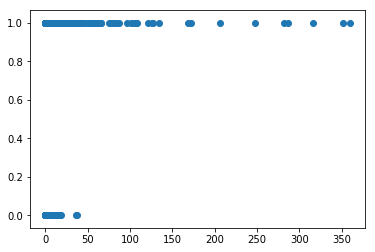

In [55]:
plt.scatter(X, y)

# Model 3 - Linear Regression
## using Striking:Grappling Time Ratio

In [56]:
# Importing the dataset
# df = pd.read_csv('fighter_data.csv')
# X = df.iloc[:, :-1].values.reshape(-1, 1)
# y = df.iloc[:, 1].values
# print(X.shape, y.shape)

In [57]:
# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [58]:
# Fitting Simple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)

In [59]:
# from sklearn.metrics import mean_squared_error, r2_score

# # Use our model to predict a value
# predicted = model.predict(X)

# # Score the prediction with mse and r2
# mse = mean_squared_error(y, predicted)
# r2 = r2_score(y, predicted)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")

In [60]:
# # Overall Score for the model
# model.score(X, y)

#### LINEAR REGRESS = VERY POOR OUTCOME.......

# Model 4 - Logistic Regression - Binary Outcome - Striker or Grappler

In [61]:
fighter_metrics_df = pd.read_csv('ml_fight_stats_final.csv', encoding='UTF-8')

In [62]:
#fighter_metrics_df.info()


fighter_metrics_df.head()

Name  estimated_minutes  submission_wins_final  \
0        Aaron Phillips                 30                      0   
1  Abdul Razak Alhassan                 35                      0   
2    Abdul-Kerim Edilov                 10                      0   
3         Abel Trujillo                 75                      0   
4        Abner Lloveras                 15                      0   

   ko_tko_wins_final  StrikingAttemptsToGrapplingAttempts_Ratio  \
0                  0                                       1.33   
1                  0                                      14.77   
2                  0                                       5.50   
3                  0                                       5.80   
4                  0                                       6.80   

   PercentRank_StrikingtoGrappingAttemps_Ratio  StrikingToGrapplingTime_Ratio  \
0                                         0.20                         110.63   
1                                         0.86                         209.00   
2                                         0.63                          15.00   
3                                         0.65                          17.11   
4                                         0.70                          23.00   

   PercentRank_StrikingToGrappingTime_Ratio  manual_stat_entry classification  
0                                      0.85                  0       Grappler  
1                                      0.91                  0        Striker  
2                                      0.30                  0       Grappler  
3                                      0.37                  0       Grappler  
4                                      0.44                  0       Grappler

## In this cell below, it illustrates ALL the DIFFERENT COMBINATIONS of MEASURES that we dropped to ONLY INCLUDE MEASURES we want to test Logistic Regression Model.

In [63]:
#This is our WINNER:

drop_list3 = ['Name','submission_wins_final', 'ko_tko_wins_final', 'manual_stat_entry', 'classification']

"""
- We achieved 87% training dataset and 84% test dataset accuracy - This is our Winner that we will use in our final
model. By dropping these columns we INCLUDED the following measures in our model: 

1) StrikingAttemptsToGrapplingAttempts_Ratio
2) PercentRank_StrikingtoGrappingAttemps_Ratio
3) StrikingToGrapplingTime_Ratio
4) PercentRank_StrikingToGrappingTime_Ratio

Results:
Training Data Score: 0.8590522478736331
Testing Data Score: 0.8581818181818182

These below were different combinations we tested prior to arriving to our conclusion:

"""

# Overfitting Concern Here:
# drop_list3 = ['Name', 'estimated_minutes','PercentRank_StrikingtoGrappingAttemps_Ratio',
#               'PercentRank_StrikingToGrappingTime_Ratio', 'manual_stat_entry', 'classification']


# 85/88 % training / test accuracy
# drop_list3 = ['Name', 'ko_tko_wins_final', 'manual_stat_entry', 'classification']

# 91/88 % training / test accuracy
#drop_list3 = ['Name', 'submission_wins_final', 'manual_stat_entry', 'classification']

# 87/86 % training / test accuracy
# drop_list3 = ['Name','estimated_minutes', 'submission_wins_final', 'ko_tko_wins_final',
#               'manual_stat_entry', 'classification']

# 86/90 % training / test accuracy
# drop_list3 = ['Name','estimated_minutes', 'submission_wins_final', 'ko_tko_wins_final',
#               'PercentRank_StrikingToGrappingTime_Ratio', 'manual_stat_entry', 'classification']

# 86/89 % training / test accuracy
# drop_list3 = ['Name','submission_wins_final', 'ko_tko_wins_final',
#               'PercentRank_StrikingToGrappingTime_Ratio', 'manual_stat_entry', 'classification']



X = fighter_metrics_df.drop(drop_list3, axis=1)
y = fighter_metrics_df["classification"]

print(X.shape, y.shape)
# print(X)
# print(y)

(1098, 5) (1098,)


In [64]:
X

estimated_minutes  StrikingAttemptsToGrapplingAttempts_Ratio  \
0                    30                                       1.33   
1                    35                                      14.77   
2                    10                                       5.50   
3                    75                                       5.80   
4                    15                                       6.80   
5                    15                                       7.00   
6                    15                                       0.00   
7                    35                                      34.71   
8                    25                                       3.49   
9                    10                                       0.00   
10                   60                                      11.31   
11                   30                                      22.60   
12                   35                                       1.90   
13                   45                                       4.74   
14                   20                                      80.50   
15                  105                                       9.99   
16                  105                                       9.03   
17                   30                                       4.00   
18                   85                                       1.98   
19                    5                                       0.00   
20                   80                                       9.91   
21                   85                                       5.23   
22                   45                                       3.97   
23                   15                                       5.00   
24                  105                                       3.83   
25                   30                                       7.46   
26                   15                                       0.00   
27                   20                                      16.86   
28                   60                                       6.77   
29                  155                                      12.32   
30                   55                                       6.55   
31                  105                                       3.37   
32                   75                                      10.69   
33                   35                                      50.13   
34                  140                                       2.95   
35                   35                                       2.82   
36                    5                                       0.00   
37                   95                                      11.72   
38                   50                                      14.58   
39                   80                                       3.86   
40                   20                                       4.67   
41                   65                                       1.91   
42                   80                                       7.75   
43                   75                                       5.28   
44                   25                                      37.00   
45                   60                                       6.17   
46                   60                                       2.70   
47                   85                                       3.03   
48                   30                                       1.10   
49                    5                                       0.00   
50                   85                                       2.92   
51                  115                                       1.99   
52                  145                                       2.46   
53                   15                                       0.00   
54                   20                                       1.56   
55                    5                                      17.00   
56              

In [65]:
from sklearn.model_selection import train_test_split

# Original:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Updated:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Updated:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
classifier.fit(X_train, y_train)

C:\Users\JOHNE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8590522478736331
Testing Data Score: 0.8581818181818182


In [70]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
# YOUR CODE HERE
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Grappler' 'Striker' 'Grappler' 'Grappler' 'Grappler' 'Grappler'
 'Grappler' 'Grappler' 'Grappler' 'Grappler']
First 10 Actual labels: ['Grappler', 'Grappler', 'Striker', 'Striker', 'Grappler', 'Grappler', 'Striker', 'Grappler', 'Grappler', 'Striker']


In [71]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results

Prediction    Actual
0     Grappler  Grappler
1      Striker  Grappler
2     Grappler   Striker
3     Grappler   Striker
4     Grappler  Grappler
5     Grappler  Grappler
6     Grappler   Striker
7     Grappler  Grappler
8     Grappler  Grappler
9     Grappler   Striker
10    Grappler  Grappler
11    Grappler  Grappler
12     Striker   Striker
13     Striker  Grappler
14     Striker   Striker
15    Grappler  Grappler
16    Grappler   Striker
17    Grappler  Grappler
18    Grappler  Grappler
19    Grappler  Grappler
20    Grappler  Grappler
21     Striker   Striker
22    Grappler  Grappler
23    Grappler  Grappler
24    Grappler  Grappler
25    Grappler  Grappler
26     Striker   Striker
27    Grappler  Grappler
28    Grappler  Grappler
29    Grappler  Grappler
30    Grappler  Grappler
31    Grappler  Grappler
32    Grappler  Grappler
33    Grappler   Striker
34     Striker   Striker
35     Striker  Grappler
36    Grappler   Striker
37     Striker   Striker
38    Grappler  Grappler
39    Grappler  Grappler
40    Grappler  Grappler
41    Grappler  Grappler
42    Grappler  Grappler
43    Grappler  Grappler
44    Grappler  Grappler
45    Grappler  Grappler
46    Grappler  Grappler
47    Grappler  Grappler
48     Striker   Striker
49     Striker   Striker
50     Striker   Striker
51    Grappler  Grappler
52    Grappler  Grappler
53    Grappler  Grappler
54     Striker   Striker
55     Striker   Striker
56    Grappler  Grappler
57     Striker   Striker
58    Grappler  Grappler
59    Grappler  Grappler
60     Striker   Striker
61    Grappler   Striker
62    Grappler  Grappler
63    Grappler   Striker
64     Striker   Striker
65    Grappler   Striker
66    Grappler  Grappler
67    Grappler  Grappler
68     Striker  Grappler
69    Grappler  Grappler
70    Grappler   Striker
71     Striker  Grappler
72     Striker   Striker
73    Grappler  Grappler
74    Grappler  Grappler
75    Grappler  Grappler
76     Striker   Striker
77    Grappler  Grappler
78    Grappler  Grappler
79    Grappler  Grappler
80    Grappler  Grappler
81     Striker   Striker
82    Grappler  Grappler
83    Grappler  Grappler
84    Grappler  Grappler
85    Grappler  Grappler
86    Grappler   Striker
87    Grappler  Grappler
88    Grappler  Grappler
89     Striker   Striker
90    Grappler  Grappler
91    Grappler  Grappler
92    Grappler  Grappler
93    Grappler  Grappler
94    Grappler  Grappler
95     Striker   Striker
96    Grappler  Grappler
97    Grappler  Grappler
98    Grappler  Grappler
99    Grappler  Grappler
..         ...       ...
175    Striker   Striker
176   Grappler  Grappler
177    Striker   Striker
178   Grappler  Grappler
179   Grappler  Grappler
180   Grappler  Grappler
181   Grappler  Grappler
182   Grappler  Grappler
183    Striker   Striker
184    Striker   Striker
185    Striker   Striker
186    Striker   Striker
187   Grappler  Grappler
188   Grappler  Grappler
189   Grappler  Grappler
190   Grappler  Grappler
191   Grappler  Grappler
192    Striker   Striker
193   Grappler  Grappler
194   Grappler  Grappler
195   Grappler  Grappler
196   Grappler   Striker
197   Grappler  Grappler
198    Striker   Striker
199    Striker   Striker
200   Grappler  Grappler
201   Grappler  Grappler
202   Grappler  Grappler
203    Striker   Striker
204   Grappler  Grappler
205   Grappler   Striker
206    Striker   Striker
207   Grappler  Grappler
208   Grappler  Grappler
209    Striker   Striker
210   Grappler  Grappler
211   Grappler  Grappler
212    Striker   Striker
213    Striker   Striker
214   Grappler  Grappler
215    Striker   Striker
216    Striker   Striker
217   Grappler  Grappler
218   Grappler  Grappler
219   Grappler  Grappler
220   Grappler   Striker
221   Grappler   Striker
222   Grappler  Grappler
223    Striker   Striker
224    Striker   Striker
225   Grappler  Grappler
226   Grappler  Grappler
227   Grappler  Grappler
228    Striker   Striker
229    Striker   Striker
230   Grappler  Grappler
231   Grappler  Grappler
232   Grappler   Striker
233 

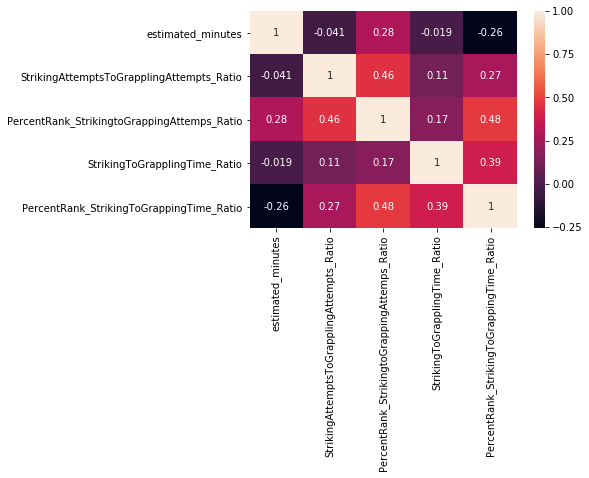

In [72]:
# Confusion Matrix on X (Features)

import seaborn as sns
sns_plot = sns.heatmap(X.corr(), annot=True)

fig = sns_plot.get_figure()
fig.savefig("confusion_matrix.png")


# Confusion Matrix
# Illustrates which features are most beneficial and confusing for the model
# to predict an user's binary classification: Grappler or Striker.


In [73]:
# Confusion Matrix on the original fighter_metric_df

# this one has a manual stat entry included, where i just marked 1 for fighters I manually looked up close to 300 fighters
# and classified, 0 for a mathematical way using some basic statistics to classify 800 other fighters

# import seaborn as sns
# sns.heatmap(fighter_metrics_df.corr(), annot=True)